# SMART HOME ENERGY ANALYSIS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pip install kaggle -q

In [4]:
# Download data using kaggle API
!kaggle datasets download rabieelkharoua/predict-smart-home-device-efficiency-dataset -f smart_home_device_usage_data.csv

Dataset URL: https://www.kaggle.com/datasets/rabieelkharoua/predict-smart-home-device-efficiency-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
smart_home_device_usage_data.csv: Skipping, found more recently modified local copy (use --force to force download)


## Load and Read data

In [6]:

df=pd.read_csv('smart_home_device_usage_data.csv')

In [7]:
df.head()

,UserID,DeviceType,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency
0,1,Smart Speaker,15.307188,1.961607,1,4,36,1
1,2,Camera,19.973343,8.610689,1,0,29,1
2,3,Security System,18.911535,2.651777,1,0,20,1
3,4,Camera,7.011127,2.341653,0,3,15,0
4,5,Camera,22.610684,4.859069,1,3,36,1


In [8]:
# CHECK FOR MISSING VALUES
df.isnull().sum()

UserID                  0
DeviceType              0
UsageHoursPerDay        0
EnergyConsumption       0
UserPreferences         0
MalfunctionIncidents    0
DeviceAgeMonths         0
SmartHomeEfficiency     0
dtype: int64

In [9]:
df.columns.to_list()

['UserID',
 'DeviceType',
 'UsageHoursPerDay',
 'EnergyConsumption',
 'UserPreferences',
 'MalfunctionIncidents',
 'DeviceAgeMonths',
 'SmartHomeEfficiency']

In [10]:
df.dtypes

UserID                    int64
DeviceType               object
UsageHoursPerDay        float64
EnergyConsumption       float64
UserPreferences           int64
MalfunctionIncidents      int64
DeviceAgeMonths           int64
SmartHomeEfficiency       int64
dtype: object

# Exploratory Data Analytics

In [12]:
df_summary = df.describe()
df_summary

,UserID,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency
count,5403.000000,5403.000000,5403.000000,5403.000000,5403.000000,5403.000000,5403.000000
mean,2702.000000,12.052992,5.054302,0.511753,2.066445,30.312234,0.376643
std,1559.856083,6.714961,2.878941,0.499908,1.423291,16.990525,0.484589
min,1.000000,0.501241,0.101562,0.000000,0.000000,1.000000,0.000000
25%,1351.500000,6.297871,2.524968,0.000000,1.000000,15.000000,0.000000
50%,2702.000000,11.903768,5.007047,1.000000,2.000000,30.000000,0.000000
75%,4052.500000,17.791751,7.611912,1.000000,3.000000,45.000000,1.000000
max,5403.000000,23.987326,9.998071,1.000000,4.000000,59.000000,1.000000


#### Visualization

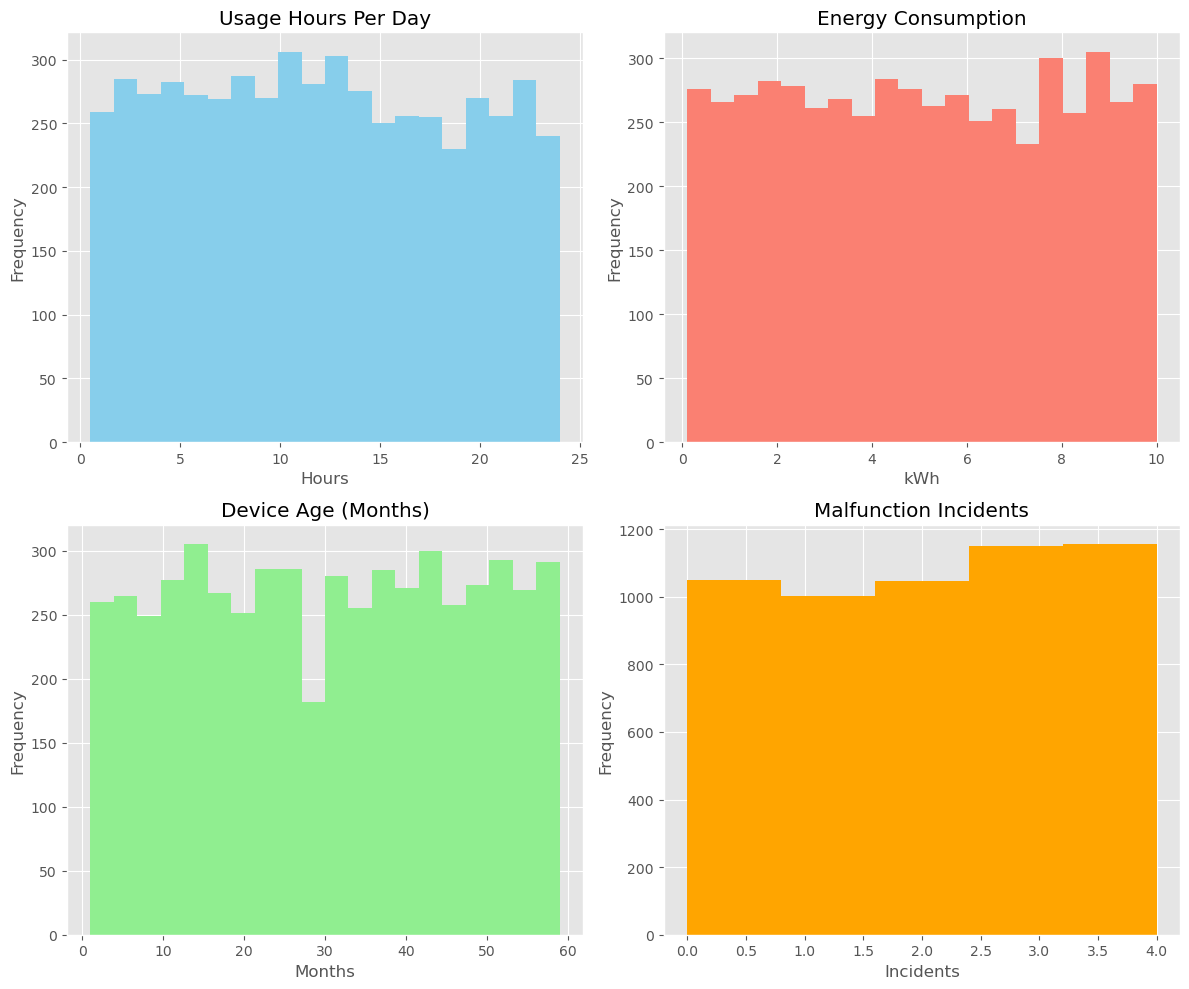

In [14]:
plt.style.use('ggplot')
fig,axes =plt.subplots(2,2, figsize=(12,10))

#Histogram for UsageHoursPerDay
axes[0,0].hist(df['UsageHoursPerDay'], bins=20, color='skyblue')
axes[0,0].set_title('Usage Hours Per Day')
axes[0,0].set_xlabel('Hours')
axes[0,0].set_ylabel('Frequency')

# Histogram for EnergyConsumption
axes[0, 1].hist(df['EnergyConsumption'], bins=20, color='salmon')
axes[0, 1].set_title('Energy Consumption')
axes[0, 1].set_xlabel('kWh')
axes[0, 1].set_ylabel('Frequency')

# Histogram for DeviceAgeMonths
axes[1, 0].hist(df['DeviceAgeMonths'], bins=20, color='lightgreen')
axes[1, 0].set_title('Device Age (Months)')
axes[1, 0].set_xlabel('Months')
axes[1, 0].set_ylabel('Frequency')

# Histogram for MalfunctionIncidents
axes[1, 1].hist(df['MalfunctionIncidents'], bins=5, color='orange')
axes[1, 1].set_title('Malfunction Incidents')
axes[1, 1].set_xlabel('Incidents')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


### Correlation Matrix

In [16]:
cor_matrix=df.corr(numeric_only=True)
cor_matrix

,UserID,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency
UserID,1.000000,-0.011917,-0.011776,0.019672,-0.009663,0.000164,0.043975
UsageHoursPerDay,-0.011917,1.000000,0.026253,0.002161,0.015126,0.025132,0.183065
EnergyConsumption,-0.011776,0.026253,1.000000,0.016709,-0.000894,-0.016691,-0.178467
UserPreferences,0.019672,0.002161,0.016709,1.000000,0.002154,-0.013781,0.608713
MalfunctionIncidents,-0.009663,0.015126,-0.000894,0.002154,1.000000,-0.027023,-0.120836
DeviceAgeMonths,0.000164,0.025132,-0.016691,-0.013781,-0.027023,1.000000,-0.197077
SmartHomeEfficiency,0.043975,0.183065,-0.178467,0.608713,-0.120836,-0.197077,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

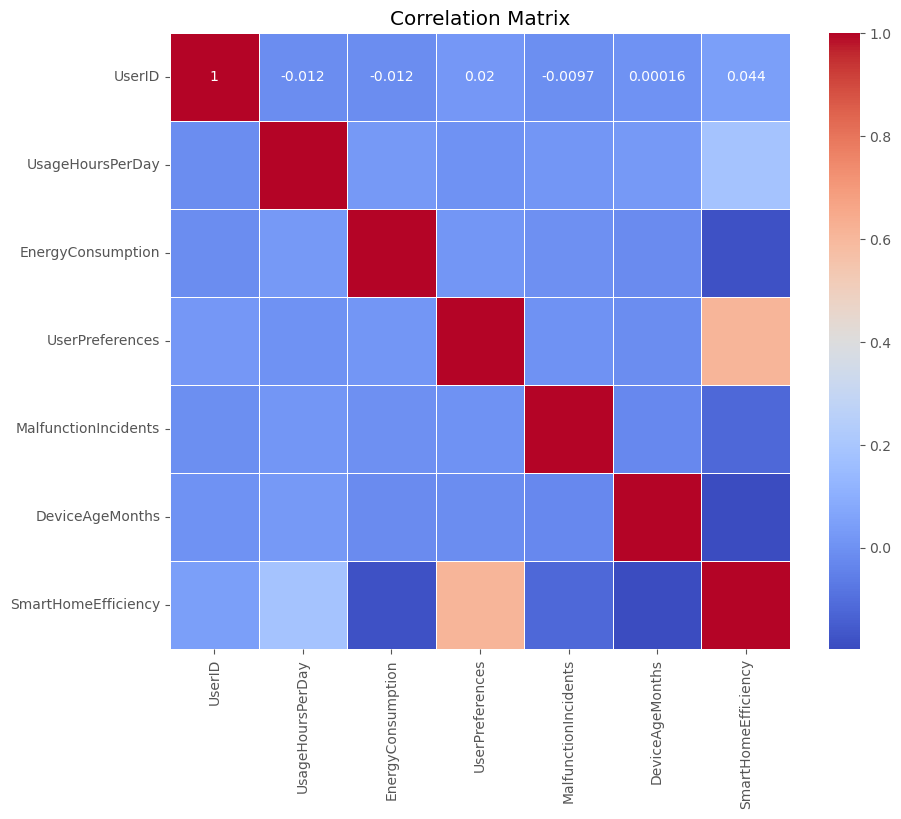

In [17]:
# Plot the HeatMap
plt.figure(figsize=(10,8))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm',linewidth=0.5)
plt.title('Correlation Matrix')


In [18]:
# Create a SQLite database in memory
import sqlite3
conn=sqlite3.connect(':memory:')
cursor =conn.cursor()

## Structured Querry Language

In [20]:
#DB Creation and data insertion

In [21]:
import sqlite3

In [22]:
#Create the database Table
cursor.execute(
    '''
CREATE TABLE SmartHomeDevices (
    UserID INTEGER,
    DeviceType TEXT,
    UsageHoursPerDay REAL,
    EnergyConsumption REAL,
    UserPreferences INTEGER,
    MalfunctionIncidents INTEGER,
    DeviceAgeMonths INTEGER,
    SmartHomeEfficiency INTEGER
)
'''
)

In [23]:
#Insert Data into the DB
df.to_sql('SmartHomeDevices', conn, if_exists='append', index=False)

5403

In [24]:
# Verify data insertion by querying the first few rows
cursor.execute('SELECT * FROM SmartHomeDevices LIMIT 5')
rows = cursor.fetchall()

In [25]:
#display
rows

[(1, 'Smart Speaker', 15.30718848124909, 1.9616068166289795, 1, 4, 36, 1),
 (2, 'Camera', 19.9733432937798, 8.610688921898104, 1, 0, 29, 1),
 (3, 'Security System', 18.91153466115779, 2.651776634718286, 1, 0, 20, 1),
 (4, 'Camera', 7.011127368264892, 2.341653090367735, 0, 3, 15, 0),
 (5, 'Camera', 22.6106839846413, 4.859069159195124, 1, 3, 36, 1)]

In [26]:
# Data Querries

### Average Usage Hours per Device Type:

- Calculate the average UsageHoursPerDay for each DeviceType

In [28]:
# Query to calculate the average UsageHoursPerDay for each DeviceType
query_avg_usage = '''
SELECT DeviceType, AVG(UsageHoursPerDay) AS AverageUsageHours
FROM SmartHomeDevices
GROUP BY DeviceType
ORDER BY AverageUsageHours DESC

'''

# Execute Query and fetch the results
cursor.execute(query_avg_usage)
avg_usage_results = cursor.fetchall()

avg_usage_results

[('Camera', 12.113434551211606),
 ('Thermostat', 12.105752901240756),
 ('Lights', 12.052646319376349),
 ('Security System', 12.016149102155167),
 ('Smart Speaker', 11.979308065895848)]

In [29]:
#convert into a dataframe for better visualization

In [30]:
usage_df = pd.DataFrame(avg_usage_results, columns =['DeviceType', 'AverageUsageHours'])
usage_df

,DeviceType,AverageUsageHours
0,Camera,12.113435
1,Thermostat,12.105753
2,Lights,12.052646
3,Security System,12.016149
4,Smart Speaker,11.979308


### Total Energy Consumption per Device Type:

- Calculate the total EnergyConsumption for each DeviceType.

In [32]:
# Query to calculate the total EnergyConsumption for each DeviceType
query_total_energy = '''
SELECT DeviceType, SUM(EnergyConsumption) AS TotalEnergyConsumption
FROM SmartHomeDevices
GROUP BY DeviceType
ORDER BY TotalEnergyConsumption DESC
'''

# Execute the query and fetch the results
cursor.execute(query_total_energy)
total_energy_results = cursor.fetchall()

# Convert the results to a DataFrame for better visualization
total_energy_df = pd.DataFrame(total_energy_results, columns=['DeviceType', 'TotalEnergyConsumption'])

total_energy_df


,DeviceType,TotalEnergyConsumption
0,Camera,5593.812982
1,Security System,5487.589413
2,Lights,5483.789011
3,Smart Speaker,5398.215903
4,Thermostat,5344.985756


### Malfunction Incidents by Device Age:

- Count the number of MalfunctionIncidents grouped by DeviceAgeMonths.

In [34]:
# Query to count the number of MalfunctionIncidents grouped by DeviceAgeMonths
query_malfunction_incidents = '''
SELECT DeviceAgeMonths, COUNT(MalfunctionIncidents) AS IncidentCount
FROM SmartHomeDevices
GROUP BY DeviceAgeMonths
ORDER BY DeviceAgeMonths
'''

# Execute the query and fetch the results
cursor.execute(query_malfunction_incidents)
malfunction_incidents_results = cursor.fetchall()

# Convert the results to a DataFrame for better visualization
malfunction_incidents_df = pd.DataFrame(malfunction_incidents_results, columns=['DeviceAgeMonths', 'IncidentCount'])

malfunction_incidents_df


,DeviceAgeMonths,IncidentCount
0,1,74
1,2,77
2,3,109
3,4,84
4,5,104
5,6,77
6,7,67
7,8,87
8,9,95
9,10,93


## Machine Learning

- Objective: Build a predictive model for SmartHomeEfficiency

#### Data Processing

In [38]:
data = df

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode the categorical variable 'DeviceType'
label_encoder = LabelEncoder()
data['DeviceType'] = label_encoder.fit_transform(data['DeviceType'])

# Define features and target variable
X = data.drop('SmartHomeEfficiency', axis=1)
y = data['SmartHomeEfficiency']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((4322, 7), (1081, 7), (4322,), (1081,))

#### Model Building

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Train a Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Predict on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print('Accuracy: ',accuracy*100,'%')


Accuracy:  87.41905642923219 %


In [42]:
print('Precision: ', precision*100,'%')

Precision:  82.96296296296296 %


In [43]:
print('Recall: ', recall*100,'%')

Recall:  83.37468982630273 %


In [44]:
print('F1-Score: ', f1*100,'%')

F1-Score:  83.16831683168317 %


In [45]:
print('Confusion Matrix: ', conf_matrix)

Confusion Matrix:  [[609  69]
 [ 67 336]]


#### Improve the Model's Performance


Random Forest classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the Random Forest model's performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

accuracy_rf, precision_rf, recall_rf, f1_rf, conf_matrix_rf


(0.9555966697502313,
 0.9404466501240695,
 0.9404466501240695,
 0.9404466501240695,
 array([[654,  24],
        [ 24, 379]], dtype=int64))

The Random Forest model significantly outperforms the Logistic Regression model in terms of accuracy, precision, recall, and F1-score. The confusion matrix also indicates a much better balance in the predictions, with fewer misclassifications.

In [50]:
#Visualize Feature Importance
# Get feature importances from the Random Forest model
feature_importances = random_forest_model.feature_importances_

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

feature_importances_df


,Feature,Importance
4,UserPreferences,0.408660
2,UsageHoursPerDay,0.136228
3,EnergyConsumption,0.134871
6,DeviceAgeMonths,0.134551
0,UserID,0.104453
5,MalfunctionIncidents,0.066127
1,DeviceType,0.015111


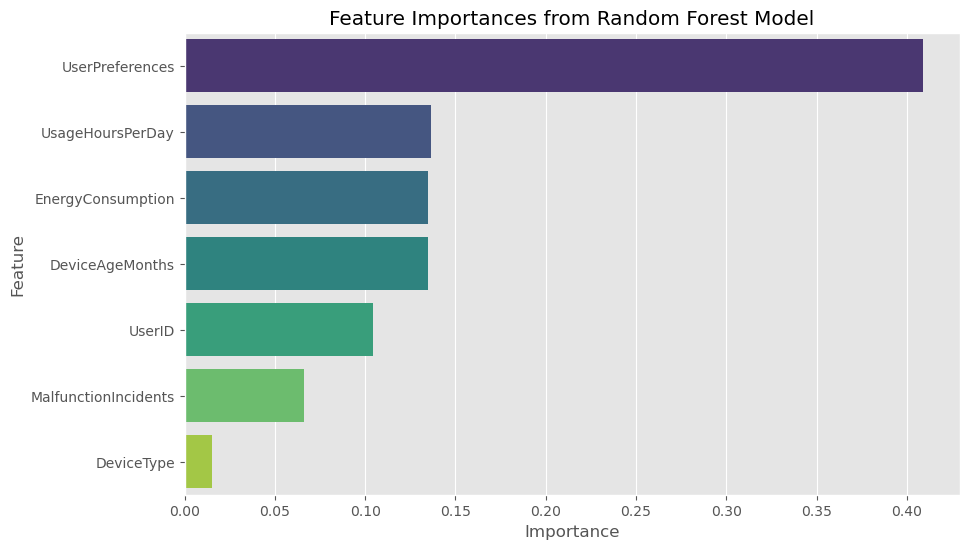

In [51]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df, palette='viridis')
plt.title('Feature Importances from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

The feature importance plot from the Random Forest model highlights the most influential features in predicting SmartHomeEfficiency. 

Here are the key takeaways:

- User preferences is the most influential feature in predicting the efficiency of a smart home. (That is mostly tied to individual usage of energy and associated characteristics.
- Usage Hours, Energy Consumption and Device Age moderately predict the efficiency.